# Chapter 5: Machine Learning

## What is Machine Learning?

Fundamentally, machine learning involves building mathematical models to help understand data.
Models *learn* when they are given tunable parameters that can be adapted to observed data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

### Categories of Machine Learning

Machine learning can fundamentally be categorized into supervised and unsupervised learning.

*Supervised learning* involves modeling the relationship between measured features of the data and some label associated with the data.
This is further subdivided into *classification* and *regression* tasks.

*Unsupervised learning* invovles modeling the features of a dataset without reference to any label, often described as "letting the data speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction*.

There is also *semi-supervised learning* somewhere between the two, which is often useful when only incomplete labels are available.

## Introducing Scikit-Learn

### Data Representation in Scikit_learn

Consider the Iris dataset, which is available as a Pandas `DataFrame` using the Seaborn library:

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Generally, we refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.
Likewise, we refer to the columns as *features*, and the number of columns as `n_features`.

By convention, the features matrix is stored in a variabble named `X`, with 2-d shape `[n_samples, n_features]`, and is most often contained in a NumPy array or Pandas `DataFrame`.
The features (i.e. columns) always refer to distinct observations that describe each sample in a quantitative manner.
They are generally real-valued, but may be Boolean or discrete-valued in some cases.

The *label* or *target* array is conventionally called `y`.
It is usually one dimensional with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
It may consist of continuous numerical values, or discrete classes/labels.
Some Scikit-Learn estimators do handle multiple tartget values, but we will primarily be working with one-dimensional targets.

Visualize the Iris features, stratified by the target `species`:

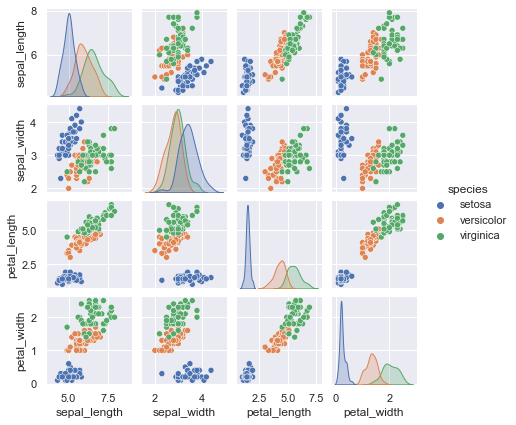

In [3]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

For use with Scikit-Learn, extract the features matrix and target array from `iris`:

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

### Scikit-Learn's Estimator API

Using the Scikit-Learn estimator API usually involves these steps:

1. Choose a class of model and import it from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into features matrix and target vector.
4. Fit the model to the data by calling the `fit()` method of the model instance.
5. Apply the model to new data:
    * For supervised learning, we often predict labels for unknown data using `predict()`.
    * For unsupervised learning, we often transform or infer properties of the data using `transform()` or `predict()` methods.

As an example, consider a simple linear regression.

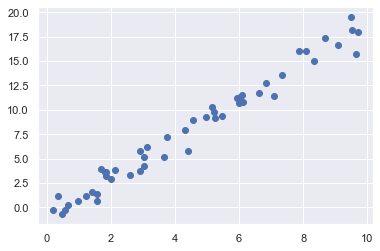

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [6]:
# 1. Choose a class of model
from sklearn.linear_model import LinearRegression

# 2. Hyperparameters: fit an intercept
model = LinearRegression(fit_intercept=True)

# 3. Arrange data. Note that the data needs to be pivoted from a vector to a matrix [n_samples, n_features]
X = x[:, np.newaxis]
X.shape

(50, 1)

In [7]:
# 4. Fit the model to the data
model.fit(X, y)

LinearRegression()

In [8]:
# All model parameters that were learned from `fit()` have trailing underscores
model.coef_, model.intercept_


(array([1.9776566]), -0.903310725531111)

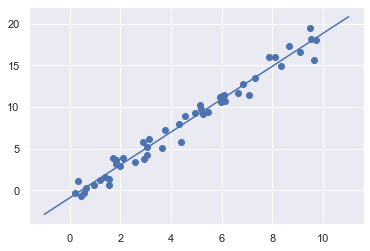

In [9]:
# 5. Predict labels for unknown data
# Make some 'new' data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

Next, we consider the Iris dataset from earlier. Our question is: given a model trained on a subset of the data, how well can we predict the remaining labels?
For this, we will use the simple generative model Gaussian naive Bayes, which assumes each class is drawn from an axis-aligned Gaussian distribution.
This is a good choice for a baseline model because it is fast and has no hyperparameters to choose.

Split the data into *training* and *testing* sets with the `train_test_split` utility function:

In [10]:
# Note that `sklearn.cross_validation` is no longer the submodule
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, )

Check out the size of the dataframes:

In [11]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

Fit the model to the train set and predict the labels on the test set:

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now use `accuracy_score` to see the fraction of correctly predicted labels:

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Next, we will attempt to reduce the dimensionality of the Iris data to more easily visualize it in two dimensions (from four dimensions).
For this, we use principal components analysis and specify two components:

In [14]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris) # Note that y is not specified
X_2d = model.transform(X_iris) # Transform the data using the fit model


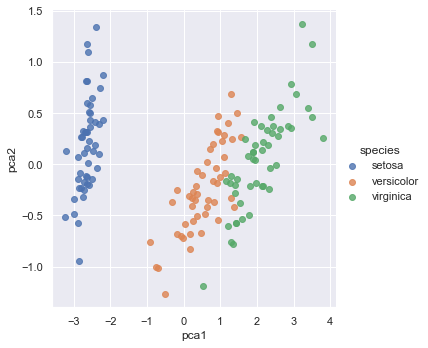

In [15]:
iris['pca1'] = X_2d[:, 0]
iris['pca2'] = X_2d[:, 1]
sns.lmplot(x='pca1', y='pca2', data=iris, hue='species', fit_reg=False);

And another unsupervised example: clustering with a Gaussian mixture model:

In [16]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)


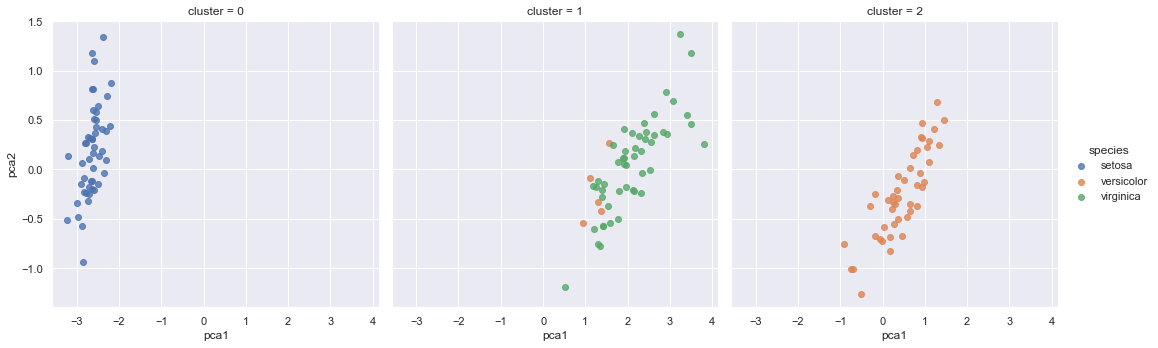

In [17]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x='pca1', y='pca2', hue='species', col='cluster', fit_reg=False);

### Application: Exploring Handwritten Digits

Import the `digits` data available from `sklearn.datasets`:

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

These are three-dimensional arrays which can be visualized:

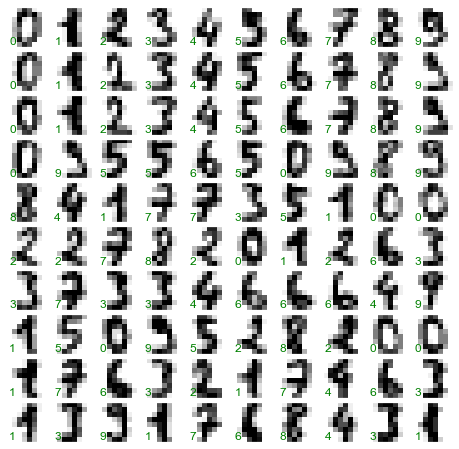

In [19]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color = 'green')

In order to work with this data in Scikit-Learn, it needs to be represented as two-dimensional `[n_samples, n_features]`.
To do this, we can treat each pixel in the image as a feature by flattening out the pixel arrays.
This, along with the digit labels, are contained in the `data` and `target` attributes:

In [20]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

There are 1797 total images, with 64 features corresponding to the 64 pixels (8x8 grid).

In order to visualize the 64 features, we'll reduce the parameter space to two dimensions using unsupervised manifold learning algorithm called *Isomap*:

In [21]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

Now that the data are two-dimensional, we can plot it and see if we can learn anything from its structure:

C:\Users\tdunn\AppData\Local\Temp\ipykernel_27760\3832024680.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='digit label', ticks=range(10))


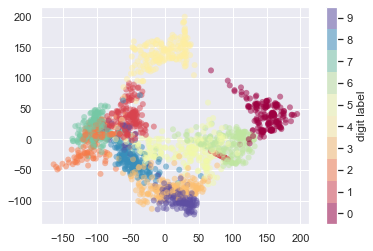

In [22]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Some of the digits, for example "1" and "0" are well-separated.
Others, like "1" and "4", have a lot of overlap.
Regardless, a straightforward supervised classification algorithm should perform suitably on this data.
Split into training and testing sets and fit a Gaussian naive Bayes model:

In [23]:
from sklearn.model_selection import train_test_split
# I'm not setting the `test_size` or `train_size`, but leaving default 20-80
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Visualize this performance with a confusion matrix:

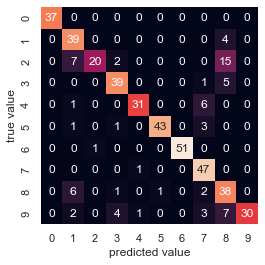

In [24]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This is a nice way to see where the misclassifications occur.
For example, many "2"s are predicted to be "8" or "1".

Plot the inputs again, with their predicted labels (green for correct, red for incorrect):

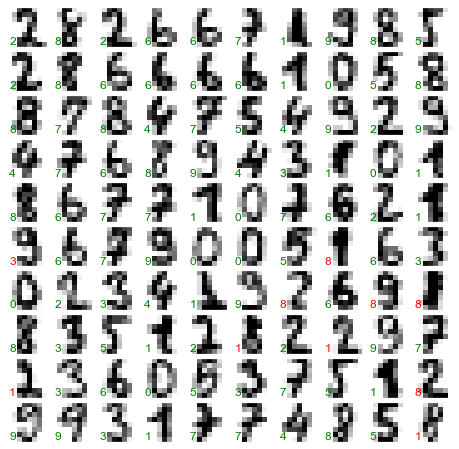

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
                    
test_images = Xtest.reshape(-1, 8, 8)
                    
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Summary

>In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API. Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds. Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

>In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

## Hyperparameters and Model Validation

### Thinking About Model Validation

In order to make informed choices on which model and which hyperparameters we use in supervised learning, we need a way to *validate* that our choices are a good fit to the data.

To illustrate some of the pitfalls in model validation, we first demonstrate a naive approach using the Iris data:

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# Use a KNN classifier with 1 neighbor, i.e. a point is given the same label as the nearest training point
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We get 100% accuracy because the model is trained and evaluated on the same data.
Moreover, this is a nearest neighbor model with $k$ = 1, which means each predicted point's nearest neighbor in the training set is itself.

We can get a better sense of a model's performance by using a *holdout set*.
This can be done with the `train_test_split` function in Scikit-Learn:

In [37]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# Fit the model on one set of data
model.fit(X1, y1)
# Evaluate on the other set
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

The downside of this approach is that we have lost a portion (50% here) of the data to the model training.
This can especially be a problem if the initial set of training data is small.
An alternative is *cross-validation*, which each subset of the data is used both as training and validation sets.
Using the splits from before:

In [39]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

We could then combine these accuracy scores (by taking the mean for example) to get a better measure of the global model performance.
This particular form of cross-validation is a *two-fold CV*.
We can split the data into more groups/folds with `cross_val_score`.
Here, five-fold CV will split the data into 80-20 training-validation:

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

There are a number of cross-validation strategies available in Scikit-Learn.
For example, we can go to the extreme and set the number of folds equal to the number of data points.
This is known as *leave-one-out* cross-validation, in which the model is trained on all but one data point, and then evaluated on the held out data point.

In [50]:
from sklearn.model_selection import LeaveOneOut

#loo = LeaveOneOut()
#loo.get_n_splits(X)

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
# 150 scores, taking the mean gives an estimate of the accuracy
scores, scores.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.96)

### Selecting the Best Model

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*
There are several possible answers:

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample

Fundamentally, the question of "the best model" is about finding a sweet spot in the trade-off between *bias* and *variance*.
A model with high bias tends to underfit the data because it does not have enough flexibility to suitably account for all the features in the data.
A model with high variance tends to overfit the data because it has so much fleixibility that it ends up accounting for random errors as well as the underlying data distribution.

If we have some ability to tune the model complexity/flexibility, we can generally find a sweet spot of performance.
This idea is illustrated in Figure 5-26, in which we see the following essential featuers:

* The training score is higher than the validation score everywhere. This is generally the case: the model will be a better fit to the data it has seen compared to held out data.
* For low model complexity (high bias), the training data is underfit, which means that the model will be a poor predictor for both the training and validation data.
* For high model complexity (high variance), the training data is overfit, which means that the model predicts the training data very well, but fails for unseen validation data.
* For some intermediate model complexity, the validation performance has a maximum, which indicates a suitable trade-off between bias and variance.

Let's look at an example with a *polynomial regression* model, in which the degree of the polynomial is a tunable parameter.

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Combine simple linear regression and polynomial preprocessor in a pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Create some data
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

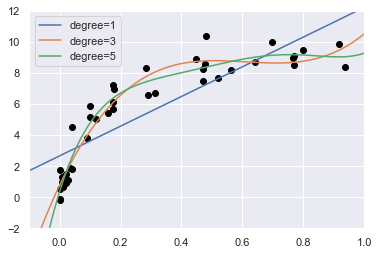

In [62]:
# Visualize the simulated data, along with various polynomial degree fits
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

We can visualize a validation curve for this particular data and model with the `validation_curve` function:

In [70]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

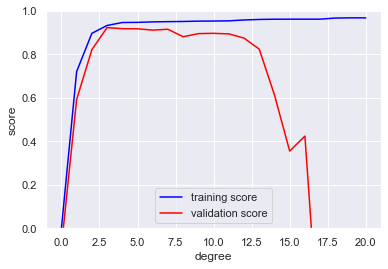

In [71]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

We can see that the optimal trade-off between bias and variance is found for a third-order polynomial.
Compute and display this polynomial over the original data:

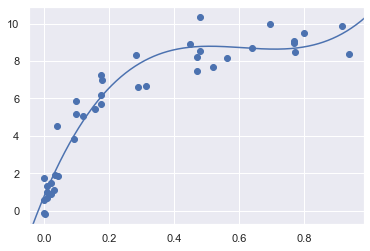

In [74]:
plt.scatter(X, y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.axis(lim);

### Learning Curves

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. For example, generate a new dataset with a factor of five more points:

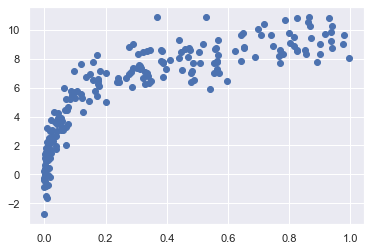

In [75]:
X2, y2 = make_data(200)
plt.scatter(X2, y2);

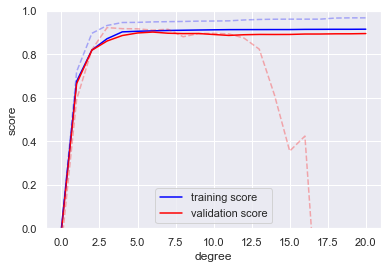

In [76]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from the solid red curve that this much large data set can support a much more complicated model.
Even a 20 degree polynomial is not overfitting the data.

Thus we see that the behavior of the validation curve depends on both the model complexity and the number of training observations.
The latter can be investigated with a *learning curve* of training/validation score versus size of the training set.
The general behavior we would expect:

* A model of a given complexity will overfit a small dataset, leading to high training score but low validation score.
* A model of a given comlpexity will underfit a large dataset, leading to decreased training score but increased validation score.
* A model will never, except by change, give a better score with the validation set than the training set, so the curves should keep getting closer together but never cross.
* At a certain point, you have enough data points that a particular model has *converged*, and more training data will not help performance.

Scikit-Learn has the convenient `learning_curve` utility for plotting this:

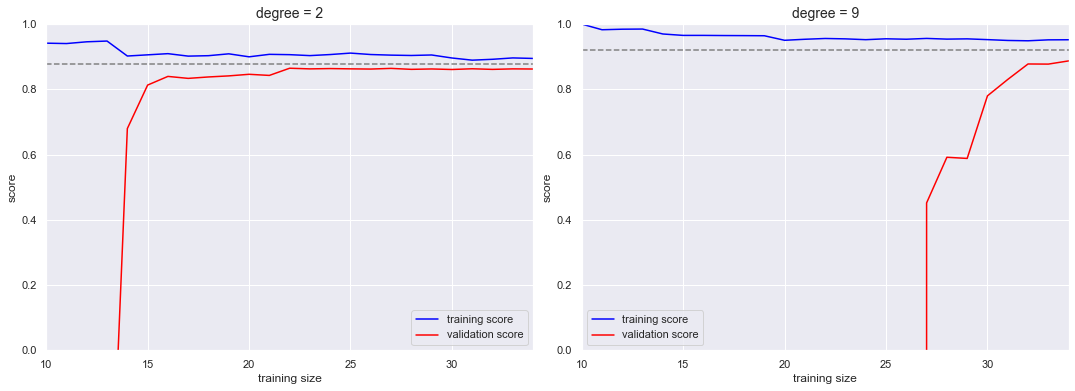

In [81]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Here we see that the much more complicated model (right: 9 degree polynomial) has a higher converged score (shown by the dashed line) but at the expense of higher model variance (indicated by the difference between the training and validation scores).
With more data points, the learning curve for the more complicated model would eventually converge.

### Validation in Practice: Grid Search

In practice, models have more than one knob to turn (hyperparameters to tune), and thus plots of validation and learning curves change from lines to multidimensional surfaces.
In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

We can do this with the `grid_search` module.
Here is an example of using grid search to vary the optimal polynomial degree, whether an intercept is fit, and whether the data are normalized:

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [91]:
# Like a normal estimator, this has not yet been applied to any data
# Fit the model at each grid point
grid.fit(X, y);

c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

In [93]:
# Now find the best parameters
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

c:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


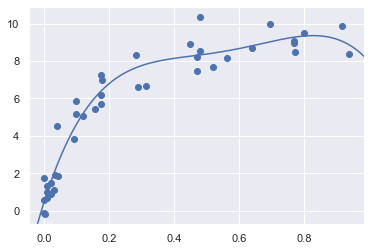

In [96]:
model = grid.best_estimator_

plt.scatter(X, y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.axis(lim);

### Summary

>In this section, we have begun to explore the concept of model validation and hyperparameter optimization, focusing on intuitive aspects of the bias–variance trade-off and how it comes into play when fitting models to data. In particular, we found that the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid over-fitting for more complex/flexible models.

>In later sections, we will discuss the details of particularly useful models, and throughout will talk about what tuning is available for these models and how these free parameters affect model complexity. Keep the lessons of this section in mind as you read on and learn about these machine learning approaches!

## Feature Engineering

All of the examples so far assumed nice tidy `[n_samples, n_features]` data sets.
In the real world, data rarely come in such a form.
With this in mind, one of the more important steps in using machine learning in practice is *feature engineering*.

### Categorical Features

Consider this `data` on housing prices, with a categorical `neighborhood` feature:

In [2]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

Encoding `neighborhood` with number mapping like `{'Queen Ann': 1, 'Fremont': 2, ...}` would imply that there is an ordering to the neighborhoods, which doesn't really make sense here.

The proven technique is *one-hot encoding* which creates extra columns indicating presence or absence of a category.
Scikit-Learn's `DictVectorizer` can be used to convert a dictionary:

In [6]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [11]:
# Note the function in the book is deprecated
vec.get_feature_names_out()

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [12]:
# Transformation can be easily reversed
data_transformed = vec.fit_transform(data)
vec.inverse_transform(data_transformed)

[{'neighborhood=Queen Anne': 1, 'price': 850000, 'rooms': 4},
 {'neighborhood=Fremont': 1, 'price': 700000, 'rooms': 3},
 {'neighborhood=Wallingford': 1, 'price': 650000, 'rooms': 3},
 {'neighborhood=Fremont': 1, 'price': 600000, 'rooms': 2}]

Other tools for this type of encoding are `sklearn.preprocessing.OneHotEncoder` and `sklearn.feature_extraction.FeatureHasher`.

### Text Features

There are many ways to convert text to a set of representative numerical values.
One of the simplest is with *word counts*:

In [22]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

# We could count the occurence of each word:
evil_count = [sum([s.lower() == 'evil' for s in phrase.split(' ')]) for phrase in sample]
evil_count

[1, 1, 0]

In [23]:
# But sklearn has helper functions
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

This outputs a sparse matrix with a row per observation and a column per word/feature. The values are the word counts.
We can inspect the sparse matrix by converting it into a `DataFrame`

In [29]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


One of the problems with this is that it puts too much weight on words that appear very frequently, which can be suboptimal in some classification algorithms.
To fix this, one approach is *term frequency-inverse document frequency* (TF-IDF) which weights word counts by how often they appear in documents:

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features

The simplest approach to encode images is to use the pixel values themselves, but this is likely not optimal.
A comprehensive summary is out of scope of this section, but there are many implementations available in the [Scikit-Image project](https://scikit-image.org/) and an example application on page 506 of the text.

### Derived Features

Derived features are those that come from some input features, like *polynomial features* from previous example.
For example, this data clearly cannot be described by a straight line:

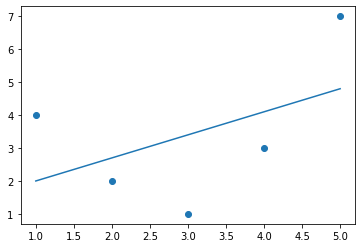

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [40]:
# Add polynomial features as extra columns to drive more flexibility in the model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


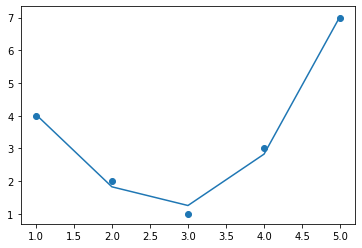

In [41]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

### Imputation of Missing Data

We saw that often the `NaN` value is used to mark missing values in `DataFrames`:

In [42]:
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

Typical machine learning models need to replace missing data with some appropriate fill value, which is known as *imputation* of missing values.
This can be simple (e.g. replacing with the mean of the column) or sophisticated (e.g. matrix completion or a robust model that handles such data).

Scikit-Learn provides the `Imputer` class:

In [44]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [45]:
# This imputed data can be fed directly into a model
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

To streamline the steps of data processing, Scikit-Learn provides a pipeline object:

In [46]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## In Depth: Naive Bayes Classification

### Bayesian Classificiation

### Gaussian Naive Bayes

### Multinomial Naive Bayes

### When to Use Naive Bayes

## In Depth: Linear Regression

### Simple Linear Regression

### Basis Function Regression

### Regularization

### Example: Predicting Bicycle Traffic